In [105]:
import numpy as np
from numpy import cos, sin
from numpy import sqrt
from scipy.sparse.linalg import expm
from pympler import asizeof


# In[2]:





# In[3]:



from numpy import random, zeros, sqrt,cos,sin

import numpy as np

import numbers

from numpy import sqrt, zeros, diag, random, real, array, complex_, transpose, conjugate, exp, matmul, real


from scipy.linalg import norm
from numpy import dot

from numpy import pi as pi
from numpy import array

import scipy

from numpy import exp, imag, real,zeros, conj
from numpy import sum
from scipy import sparse
from numpy import array
import scipy.sparse as sp
from numpy import concatenate

from scipy.sparse import csr_matrix
from numpy import sqrt, dot
from numpy.random import choice
from numpy.random import normal
from numpy import sqrt


from numpy import add
from numpy import concatenate

from scipy.sparse import kron

#t0=time.time()

import numpy as np
import pandas as pd
import numpy as np
from scipy.sparse import kron
from scipy.sparse import coo_matrix, identity



# In[4]:


S_spin=3   #determine the number of Zeeman levels (2S+1)

#Parameters  (Check the units)

B_Q=-1.85 # in Vdd units
N_atom=192
Levels=int(2*S_spin+1)
Atom_cutoff=9
max_step=0.001



#Array Vij will be provided by Sean, just we will play with a random Vij for testing that the code makes sense.
#Mgen=np.random.rand(N_atom,N_atom)


Vij_p=array(pd.read_csv('Vij.csv', header=None))


# In[5]:



import numpy as np
from numpy import sin, cos, sqrt

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

from numpy import sqrt


# In[6]:


Vij=(Vij_p-np.diag(np.diag(Vij_p)))


# In[7]:


VijN=np.zeros((N_atom,N_atom))

for j in range(N_atom):
    
    VijN[j]=Vij[j][:N_atom]
    
    


# In[8]:


Vij=VijN


# In[ ]:





# In[9]:



def index_Gij(arr,Atom_cutoff):
    
    Ordered_N = list(np.argsort(arr)[::-1][:Atom_cutoff])
    
    return Ordered_N

# Provides a list of lists with the arrays that belong to each cluster


Index_N=[]

Rem_iden=abs(Vij)


for j in range(Rem_iden.shape[0]):
    
    test_list = list(Rem_iden[j])
    
    Index_N.append( [j]+list(index_Gij(test_list,Atom_cutoff-1))  )


# In[ ]:





# In[10]:


def RedVij(list_index,Atom_cutoff=Atom_cutoff):
    
    Vijred=np.zeros((Atom_cutoff,Atom_cutoff))
    
    Iterator_list=Index_N[list_index]
    
    for i in range(Atom_cutoff):
        for j in range(Atom_cutoff):
            
            Vijred[i,j]=Vij[Iterator_list[i],Iterator_list[j]]
            
    return Vijred

In [106]:
np.sum(RedVij(0),axis=1)

array([-1.13764466, -1.97561759, -1.97561759, -0.52481328, -0.52481328,
       -0.65322201, -0.65322201, -1.67462602, -1.67462602])

In [107]:
RedVij(0).round(3)

array([[ 0.   , -1.173, -1.173,  0.978,  0.978, -0.227, -0.227, -0.147,
        -0.147],
       [-1.173,  0.   , -0.147, -0.083, -0.227, -0.108,  0.978, -1.173,
        -0.043],
       [-1.173, -0.147,  0.   , -0.227, -0.083,  0.978, -0.108, -0.043,
        -1.173],
       [ 0.978, -0.083, -0.227,  0.   ,  0.122,  0.028, -1.173, -0.063,
        -0.108],
       [ 0.978, -0.227, -0.083,  0.122,  0.   , -1.173,  0.028, -0.108,
        -0.063],
       [-0.227, -0.108,  0.978,  0.028, -1.173,  0.   , -0.028, -0.04 ,
        -0.083],
       [-0.227,  0.978, -0.108, -1.173,  0.028, -0.028,  0.   , -0.083,
        -0.04 ],
       [-0.147, -1.173, -0.043, -0.063, -0.108, -0.04 , -0.083,  0.   ,
        -0.018],
       [-0.147, -0.043, -1.173, -0.108, -0.063, -0.083, -0.04 , -0.018,
         0.   ]])

In [108]:
RedVij(1).round(3)

array([[ 0.   , -1.173, -1.173,  0.978,  0.978, -0.227, -0.227, -0.147,
        -0.147],
       [-1.173,  0.   , -0.147, -0.227, -0.083,  0.978, -0.108, -1.173,
        -0.043],
       [-1.173, -0.147,  0.   , -0.083, -0.227, -0.108,  0.978, -0.043,
        -1.173],
       [ 0.978, -0.227, -0.083,  0.   ,  0.122,  0.028, -1.173, -0.108,
        -0.063],
       [ 0.978, -0.083, -0.227,  0.122,  0.   , -1.173,  0.028, -0.063,
        -0.108],
       [-0.227,  0.978, -0.108,  0.028, -1.173,  0.   , -0.028, -0.083,
        -0.04 ],
       [-0.227, -0.108,  0.978, -1.173,  0.028, -0.028,  0.   , -0.04 ,
        -0.083],
       [-0.147, -1.173, -0.043, -0.108, -0.063, -0.083, -0.04 ,  0.   ,
        -0.018],
       [-0.147, -0.043, -1.173, -0.063, -0.108, -0.04 , -0.083, -0.018,
         0.   ]])

In [109]:
from itertools import permutations

def a_p(a, b, p):
    p = np.array(p)
    a_p = a[p]
    a_p = a_p[:, p]
    return a_p


def Permut(a, b):
    for p in permutations(range(a.shape[0])):
        if (a_p(a, b, p) == b).all():
            return True
    return False 

In [110]:
Compare(RedVij(0),RedVij(10))

0

In [111]:
from itertools import permutations

a=RedVij(0)
b=RedVij(10)

def a_p(a, b, p):
    p = np.array(p)
    a_p = a[p]
    a_p = a_p[:, p]
    return a_p

VDecide=np.zeros((N_atom,N_atom))

for k in range(N_atom):
    a=RedVij(k)
    
    print(k/N_atom)
    for w in range(N_atom):
        
        b=RedVij(w)
        
        VDecide[k,w]=Permut(a,b)


0.0
0.005208333333333333
0.010416666666666666
0.015625
0.020833333333333332
0.026041666666666668
0.03125
0.036458333333333336
0.041666666666666664
0.046875
0.052083333333333336
0.057291666666666664
0.0625
0.06770833333333333
0.07291666666666667
0.078125
0.08333333333333333
0.08854166666666667
0.09375
0.09895833333333333
0.10416666666666667
0.109375
0.11458333333333333
0.11979166666666667
0.125
0.13020833333333334
0.13541666666666666
0.140625
0.14583333333333334
0.15104166666666666
0.15625
0.16145833333333334
0.16666666666666666
0.171875
0.17708333333333334
0.18229166666666666
0.1875
0.19270833333333334
0.19791666666666666
0.203125
0.20833333333333334
0.21354166666666666
0.21875
0.22395833333333334
0.22916666666666666
0.234375
0.23958333333333334
0.24479166666666666
0.25
0.2552083333333333
0.2604166666666667
0.265625
0.2708333333333333
0.2760416666666667
0.28125
0.2864583333333333
0.2916666666666667
0.296875
0.3020833333333333
0.3072916666666667
0.3125
0.3177083333333333
0.3229166666666

In [112]:
norm(VDecide-1)

0.0

In [95]:
def AndyK(a, b):
    for p in permutations(range(a.shape[0])):
        if (a_p(a, b, p) == b).all():
            return True
    return False 

In [97]:
int(AndyK(RedVij(0),RedVij(10)))

1

In [66]:
(np.sum(np.concatenate(abs(RedVij(0)))))

23.806721936260004

In [67]:
res=[]

for j in range(N_atom):
    res.append((np.sum(np.concatenate(abs(RedVij(j))))))

In [ ]:
res=[]

for j in range(N_atom):
    res.append((np.sum(np.concatenate(abs(RedVij(j))))))

In [68]:
RedVij(0).round(4)

array([[ 0.    , -1.1727, -1.1727,  0.9778,  0.9778, -0.2274, -0.2274,
        -0.1466],
       [-1.1727,  0.    , -0.1466, -0.0831, -0.2274, -0.1077,  0.9778,
        -1.1727],
       [-1.1727, -0.1466,  0.    , -0.2274, -0.0831,  0.9778, -0.1077,
        -0.0434],
       [ 0.9778, -0.0831, -0.2274,  0.    ,  0.1222,  0.0285, -1.1727,
        -0.0626],
       [ 0.9778, -0.2274, -0.0831,  0.1222,  0.    , -1.1727,  0.0285,
        -0.1077],
       [-0.2274, -0.1077,  0.9778,  0.0285, -1.1727,  0.    , -0.0284,
        -0.0403],
       [-0.2274,  0.9778, -0.1077, -1.1727,  0.0285, -0.0284,  0.    ,
        -0.0831],
       [-0.1466, -1.1727, -0.0434, -0.0626, -0.1077, -0.0403, -0.0831,
         0.    ]])

In [69]:
RedVij(1).round(4)

array([[ 0.    , -1.1727, -1.1727,  0.9778,  0.9778, -0.2274, -0.2274,
        -0.1466],
       [-1.1727,  0.    , -0.1466, -0.2274, -0.0831,  0.9778, -0.1077,
        -1.1727],
       [-1.1727, -0.1466,  0.    , -0.0831, -0.2274, -0.1077,  0.9778,
        -0.0434],
       [ 0.9778, -0.2274, -0.0831,  0.    ,  0.1222,  0.0285, -1.1727,
        -0.1077],
       [ 0.9778, -0.0831, -0.2274,  0.1222,  0.    , -1.1727,  0.0285,
        -0.0626],
       [-0.2274,  0.9778, -0.1077,  0.0285, -1.1727,  0.    , -0.0284,
        -0.0831],
       [-0.2274, -0.1077,  0.9778, -1.1727,  0.0285, -0.0284,  0.    ,
        -0.0403],
       [-0.1466, -1.1727, -0.0434, -0.1077, -0.0626, -0.0831, -0.0403,
         0.    ]])

In [70]:


(np.linalg.inv(RedVij(0))@RedVij(1)).round(4)

array([[  1.    ,  -1.0491,   1.0491,  -0.9567,   0.9567,   6.5383,
         -6.5383,  -0.2352],
       [  0.    ,   0.9716,   0.0284,  -0.0177,   0.0177,   0.4426,
         -0.4426,  -0.0176],
       [  0.    ,   2.478 ,  -1.478 ,   2.2513,  -2.2513, -15.7085,
         15.7085,   0.5668],
       [  0.    ,   0.967 ,  -0.967 ,   1.0646,  -0.0646,  -0.1501,
          0.1501,  -0.0307],
       [  0.    ,   1.4107,  -1.4107,   2.1035,  -1.1035, -14.6675,
         14.6675,   0.5638],
       [ -0.    ,  -1.0557,   1.0557,  -0.9372,   0.9372,   7.3965,
         -6.3965,  -0.2711],
       [ -0.    ,  -1.0869,   1.0869,  -1.0165,   1.0165,   6.9563,
         -5.9563,  -0.2093],
       [ -0.    ,  -0.412 ,   0.412 ,  -0.3757,   0.3757,   2.5677,
         -2.5677,   0.9076]])

In [71]:
res=[]

for j in range(N_atom):
    res.append((np.sum(np.concatenate(abs(RedVij(j))))))

In [72]:
restd=[]

for j in range(N_atom):
    restd.append((np.std(RedVij(j))))

In [73]:
import matplotlib.pyplot as plt

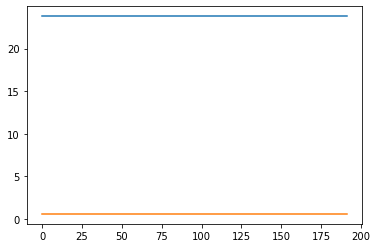

In [74]:
plt.plot(res)
plt.plot(restd)

In [2]:
# In[11]:


VijredAv=np.zeros((Atom_cutoff,Atom_cutoff))


for j in range(N_atom):
    
    VijredAv=VijredAv+RedVij(j)
    
VijredAv=VijredAv/N_atom  


# In[ ]:





# In[12]:



Vijsumfc=np.zeros((N_atom,N_atom))
    

for i in range(N_atom):
    Viabs=( RedVij(i) )
    
    
    
    for j in range(N_atom):
        Vjabs=( RedVij(j))
        
        Vvij=Viabs-Vjabs
        
        T1=Vvij[  0]
        T2=Vvij[:,0]
        
        
        Vijsumfc[i,j]=sum(abs(T1))+sum(abs(T2))
            
            
    
    


# In[13]:


Vijsumfc   #check if st row and column is equal in each cluster


# In[ ]:





# In[14]:


#https://easyspin.org/easyspin/documentation/spinoperators.html


#Define Sz

Val=np.linspace(-S_spin,S_spin,int(2*S_spin+1))
Coord=np.linspace(0,2*S_spin,int(2*S_spin+1))
    
Sz_sp=sparse.coo_matrix((Val,(Coord,Coord)),shape=(int(2*S_spin+1),int(2*S_spin+1)),dtype="complex") 


# In[15]:


#Define Splus

Val=[]


for j in range(1,int(2*S_spin)+1):
    
    Val.append(sqrt((S_spin)*(S_spin+1)-(S_spin-j)*(S_spin+1-j)))
    

Coord=np.linspace(0,int(2*S_spin)-1,int(2*S_spin))    
Splu_sp=(sparse.coo_matrix((Val,(Coord,Coord+1)),shape=(int(2*S_spin)+1,int(2*S_spin)+1),dtype="complex")) 

Sx_sp=(Splu_sp+Splu_sp.T)/2
Sy_sp=(Splu_sp-Splu_sp.T)/(2j)


# In[ ]:





# In[16]:


#Initial state |S,-S>
Init_st=(sparse.coo_matrix(([1],([Levels-1],[0])),shape=(int(2*S_spin)+1,1),dtype="complex")) 

#Rotated initial state

Init_st_rot=(expm(scipy.sparse.csc_matrix(-1j*(np.pi/2)*Sy_sp))@Init_st)


# In[17]:


Id_Spin=scipy.sparse.identity(Levels, dtype='complex')

Zero_Spin=0*Id_Spin


def Zeeman_Popul(m_s):
    
    return sparse.coo_matrix(([1],([S_spin-m_s],[S_spin-m_s])),shape=(Levels,Levels),dtype="complex")


# In[18]:


Init_st_rot.toarray()


# In[ ]:





# In[19]:


Init_st_rot


# In[20]:


Init_Total_rot=Init_st_rot

for j in range(Atom_cutoff-1):
    
    Init_Total_rot=kron(Init_Total_rot,Init_st_rot)
    


# In[21]:


Init_Total_rot=coo_matrix(Init_Total_rot)  #Initial state wavefunction


# In[22]:


Init_Total_rot


# In[ ]:





# In[23]:



def tensor_id(ArrayL ):
    
    Tensor_id=kron(ArrayL[0],ArrayL[1])
    
    Array_id=Atom_cutoff*[Id_Spin]    
    
    for j in range(2,len(ArrayL)):
        
        Tensor_id=kron(Tensor_id,Array_id[j])
        
    
    #return coo_matrix(Tensor_id.todense())
    return coo_matrix(Tensor_id)


# In[ ]:





# In[24]:


Iden_Tensor=coo_matrix(identity((Levels)**Atom_cutoff, dtype='complex'))
Zero_Tensor=0*Iden_Tensor


# In[25]:


import functools as ft
from functools import reduce

lst = Atom_cutoff*[Id_Spin]
XX = reduce(kron, lst)


# In[ ]:





# In[26]:


#pip install pympler


# In[27]:


def A_i_tensor(A_op,i_index):
    
    Array_id=Atom_cutoff*[Id_Spin] 
    
    Array_id[i_index]=A_op
    
    return reduce(kron, Array_id)
    


# In[ ]:





# In[ ]:





# In[28]:


def tensor_kjXYZ2( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma
        
    Array_idX   = Atom_cutoff*[Id_Spin]   
    Array_idX[k]= Sx_sp
    Array_idX[j]= Sx_sp
    
    Array_idY   = Atom_cutoff*[Id_Spin]
    Array_idY[k]= Sy_sp
    Array_idY[j]= Sy_sp
    
    Array_idZ   = Atom_cutoff*[Id_Spin]
    Array_idZ[k]= Sz_sp
    Array_idZ[j]= Sz_sp

    return reduce(kron, Array_idX),reduce(kron, Array_idY),reduce(kron, Array_idZ) 


# In[ ]:





# In[29]:


def tensor_termIntact( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma
        
    Array_idX   = Atom_cutoff*[Id_Spin]   
    Array_idX[k]= Sx_sp
    Array_idX[j]= Sx_sp
    
    Array_idY   = Atom_cutoff*[Id_Spin]
    Array_idY[k]= Sy_sp
    Array_idY[j]= Sy_sp
    
    Array_idZ   = Atom_cutoff*[Id_Spin]
    Array_idZ[k]= Sz_sp
    Array_idZ[j]= Sz_sp

    return reduce(kron, Array_idZ)-0.5*( reduce(kron, Array_idX)+reduce(kron, Array_idY) ) 


# In[ ]:





# In[ ]:





# In[30]:


def tensor_kjXX( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma 
    Array_id=Atom_cutoff*[Id_Spin]  
    
    Array_id[k]=Sx_sp
    Array_id[j]=Sx_sp

    return reduce(kron, Array_id)


# In[31]:


def tensor_kjYY( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma 
    Array_id=Atom_cutoff*[Id_Spin]  
    
    Array_id[k]=Sy_sp
    Array_id[j]=Sy_sp

    return reduce(kron, Array_id)


# In[32]:


def tensor_kjZZ( k , j):   #tensor among k,j are Positions in the cluster after the G classification
                         #k is +sigma and j is -sigma 
    Array_id=Atom_cutoff*[Id_Spin]  
    
    Array_id[k]=Sz_sp
    Array_id[j]=Sz_sp

    return reduce(kron, Array_id)


# In[33]:


Sz_cuad=Sz_sp@Sz_sp


# In[34]:


def tensor_k_Zcuad( k ):  #Excited state k is a Position in the cluster after the G classification
    
    Array_id=Atom_cutoff*[Id_Spin]  
    
    Array_id[k]=Sz_cuad
        
    return reduce(kron, Array_id)


# In[ ]:





# In[35]:


# Construct a vector with |C_i| elements equal to A_i_tensor(Sz_cuad,j)

Sz_cuad_array=Zero_Tensor


for j in range(Atom_cutoff):
    
    Sz_cuad_array+= B_Q* A_i_tensor(Sz_cuad,j)
    


# In[ ]:





# In[36]:



def Hamilt_ic_Red():
     
    Hamil=Sz_cuad_array
    
    
    for j in range(Atom_cutoff):
        
        for k in range(j+1,Atom_cutoff):
            

            Ten_jk = tensor_termIntact( j , k)

            
            Hamil=Hamil+ VijredAv[j,k]*Ten_jk
            
            #print(j,k,"IndexN", IL_j,IL_k)
            

    return  Hamil


# In[ ]:





# In[37]:



def Hamilt_ic(index_center):
     
    Index_list=Index_N[index_center]
    Hamil=Sz_cuad_array
    
    
    for j in range(Atom_cutoff):
        
        IL_j   = Index_list[j]
        
        for k in range(j+1,Atom_cutoff):
            
            
            IL_k   = Index_list[k]

            Ten_jk = tensor_termIntact( j , k)

            
            Hamil=Hamil+ Vij[IL_j,IL_k]*Ten_jk
            
            #print(j,k,"IndexN", IL_j,IL_k)
            

    return  Hamil


# In[38]:



def f(t, yR,M_vect,b):

    return -1j*M_vect@yR


# In[39]:




Zeeman_Operators=[]


for j in range(-S_spin,S_spin+1):
    
    Zeeman_Operators.append(A_i_tensor(Zeeman_Popul( -j),0))
    


# In[41]:


tspan=np.linspace(0,2,50)




# In[42]:


from scipy.integrate import solve_ivp


index_center=1


# In[ ]:





# In[43]:


T_init=tspan[0]

T_fin =tspan[-1]



def Dynam_Popul_CI():
    
    Populations=np.zeros((Levels,len(tspan)))
    
    #
    #Hamilt_ic(index_center)
    

    sol = solve_ivp(f, [tspan[0], tspan[-1]], list(Init_Total_rot.toarray().T[0]),args=(Hamilt_ic(0),None),dense_output=True,max_step=max_step )
    #sol = solve_ivp(f, [T_init, T_fin], list(Init_Total_rot.toarray().T[0]),args=(Hamilt_ic_CMFT(index_center,Vj_dot_MV_XYZ,Mean_Val_XYZ),None),dense_output=True,max_step=0.001 )

    Sol_dense=sol.sol(tspan)
    
    
    for j in range(Levels):
        
        Populations[j]=real((diag((conj(Sol_dense.T)@(Zeeman_Operators[j]@Sol_dense)))))
        
        
    return Populations

    


# In[47]:


ResultFinal=Dynam_Popul_CI()


# In[ ]:





# In[48]:


VarL=(3**2)*ResultFinal[0]
VarL=VarL+(2**2)*ResultFinal[1]
VarL=VarL+(1**2)*ResultFinal[2]
VarL=VarL+(0**2)*ResultFinal[3]
VarL=VarL+((-1)**2)*ResultFinal[4]
VarL=VarL+((-2)**2)*ResultFinal[5]
VarL=VarL+((-3)**2)*ResultFinal[6]


# In[49]:


#VarL0dot01=VarL

#VarL0dot1=VarL
VarL0dot001=VarL


# In[ ]:





# In[50]:


Shape=VarL0dot001.shape[0]


# In[51]:


VarL0dot001=VarL0dot001.reshape(Shape,1)


# In[52]:


tspan=tspan.reshape(Shape,1)


# In[ ]:





# In[56]:



Res_conc=np.concatenate((tspan,VarL0dot001),axis=1)
Res_conc=np.concatenate((Res_conc[0].reshape(1,len(Res_conc[0])),Res_conc),axis=0)


# In[57]:


Random_signature=np.random.rand(1,1)[0,0].round(6)


# In[58]:


file = open("_MACE_AV__N_atom_"+str(N_atom)+"_Cluster_size_"+str(Atom_cutoff)+"_Max_step_"+str(max_step)+"_Tspan_"+str(tspan[0,0])+"-"+str(tspan[-1,0])+"_Signature_"+str(Random_signature)+".txt", "w+")
np.savetxt(file, Res_conc, delimiter=',')
file.write('\n')
file.write('\n')
file.close()   


#import pandas as pd
#Res0128_1dot25_0=np.array(pd.read_csv('_MACE_AV__N_atom192_Cluster_size_4_Max_step_0.001_Tspan_0.0-2.0_Signature_0.520019.txt')).astype(complex)